In [291]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


In [292]:
movies=pd.read_csv('../datasets/tmdb.movies.csv', index_col=0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [293]:
movies.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [294]:
movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [295]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [296]:
movies.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [297]:
movies.drop_duplicates(inplace=True)

In [298]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [299]:
budgets = pd.read_csv("../datasets/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [300]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [301]:
budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [302]:
budgets.duplicated().value_counts()

False    5782
dtype: int64

In [303]:
budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [304]:
def currency(col):
    """Removes '$' and ',' from a column and converts it to numeric."""
    return pd.to_numeric(col.str.replace('$', '').str.replace(',', ''))


In [305]:
budgets['production_budget'] = currency(budgets['production_budget'])


In [306]:
budgets['domestic_gross'] = currency(budgets['domestic_gross'])


In [307]:
budgets['worldwide_gross'] = currency(budgets['worldwide_gross'])

In [308]:
# converting date to datetime
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [309]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [310]:
joined_df = pd.merge(
    budgets,
    movies,
    left_on='movie',         # Movie title from budgets dataset
    right_on='original_title', # Original title from movies dataset
    how='inner'                # Only keep rows that match in BOTH DataFrames
)

In [311]:
print(movies.columns)
print(budgets.columns)
print(joined_df.columns)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'genre_ids', 'id_y',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'title', 'vote_average', 'vote_count'],
      dtype='object')


In [312]:
joined_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [313]:
print((joined_df['movie'] == joined_df['original_title']).all())
print((joined_df['movie'] == joined_df['title']).all())


True
False


In [314]:
print((joined_df['release_date_y'] == joined_df['release_date_x']).all())


False


In [315]:
joined_df['release_date_y'].value_counts()

2015-10-16    10
2015-11-20     9
2010-01-01     9
2014-12-25     8
2015-03-27     8
              ..
2010-07-03     1
2012-01-06     1
2010-01-29     1
2015-09-08     1
2011-12-02     1
Name: release_date_y, Length: 1016, dtype: int64

In [316]:
joined_df['release_date_x'].value_counts()

2012-12-31    12
2010-12-31    11
2014-12-31    10
2011-10-21     9
2014-10-10     9
              ..
1996-09-20     1
2012-06-27     1
2010-09-01     1
2004-04-23     1
2014-01-24     1
Name: release_date_x, Length: 867, dtype: int64

In [317]:
#Format the release Date of the Number data to clean up data
# extract  the year and month from the column
movies['release_year']=pd.to_datetime(movies['release_date']).dt.year
movies['release_month']=pd.to_datetime(movies['release_date']).dt.month
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [318]:
#Format the release Date of the Number data to clean up data
# extract  the year and month from the column
budgets['release_year']=pd.to_datetime(budgets['release_date']).dt.year
budgets['release_month']=pd.to_datetime(budgets['release_date']).dt.month
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [319]:
joined_df.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'genre_ids', 'id_y',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [320]:
# 1. Define the redundant columns to drop
drop_columns = [
    'id_y',          # The ID from the budgets file
    'id_x',             # The ID from the TMDB file
    'release_date_x',   # The release date from the TMDB file (we keep the one from budgets)
    'original_title',      # Duplicate of the 'movie' column used for joining
    'title'                # Duplicate of the 'movie' column
]

# 2. Drop the redundant columns in place
joined_df.drop(columns=drop_columns, inplace=True)

# 3. Rename the kept date column for clarity
joined_df.rename(columns={'release_date_budgets': 'release_date'}, inplace=True)


In [321]:
joined_df['profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']

In [322]:
joined_df['release_year'] = pd.to_datetime(joined_df['release_date_y']).dt.year
joined_df['release_month'] = pd.to_datetime(joined_df['release_date_y']).dt.month

In [323]:
joined_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_date_y,vote_average,vote_count,profit,release_year,release_month
0,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,26.526,2009-12-18,7.4,18676,2351345279,2009,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,30.579,2011-05-20,6.4,8571,635063875,2011,5
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457,1072413963,2015,5
3,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948,1748134200,2018,4
4,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",en,34.953,2017-11-17,6.2,7510,355945209,2017,11


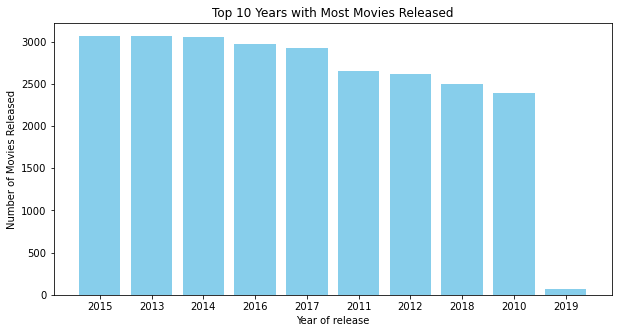

In [324]:
#   Which year had the most movie releases?
# Count and get top 10 years
movies_counts = (movies.groupby('release_year').size().reset_index(name='Movies Released').sort_values(by='Movies Released', ascending=False).head(10))

# Plot
plt.figure(figsize=(10,5))
plt.bar(movies_counts['release_year'].astype(str), movies_counts['Movies Released'], color='skyblue')
plt.title('Top 10 Years with Most Movies Released')
plt.xlabel('Year of release')
plt.ylabel('Number of Movies Released')
plt.show()


##### More than 3000 movies were released in the year 2015

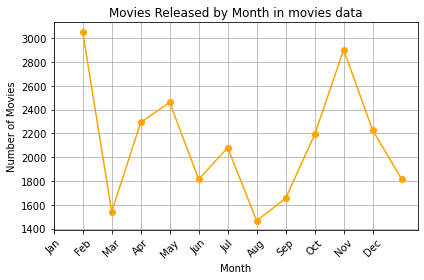

In [325]:

# plot seasonal time trend of the movie production
movies['release_month'].value_counts().sort_index().plot(kind='line',marker = 'o' ,color='orange')
plt.title('Movies Released by Month in movies data')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


##### February was the Month where most movies were released followed by Novemmber
##### March and august have the least number of movies released

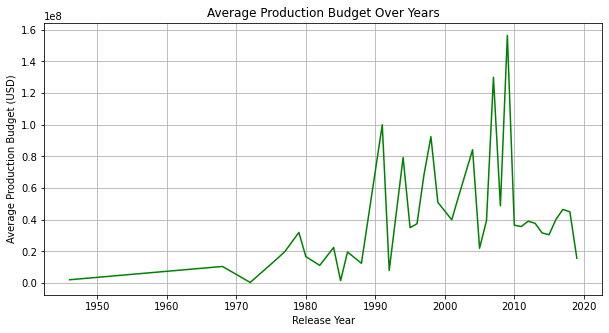

In [326]:
budget_trend = joined_df.groupby('release_year')['production_budget'].mean()
budget_trend.plot(kind='line', figsize=(10,5), color='green')
plt.title('Average Production Budget Over Years')
plt.xlabel('Release Year')  
plt.ylabel('Average Production Budget (USD)')
plt.grid(True)
plt.show()

# Time Period,Key Observation
##### 1970s - 1980s,Budgets were relatively low and stable (under $10M on average).
##### 1990s,"Budgets began a rapid, consistent climb, moving from about $15M to over $40M. This marks the beginning of the blockbuster era."
##### 2000 - 2019,"Budgets stabilized at a high level, generally fluctuating between $45M and $75M per movie. This reflects the consistent investment required for modern CGI and global marketing campaigns."

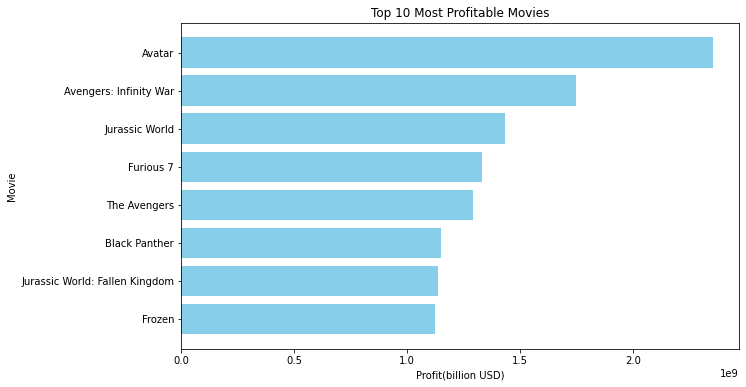

In [327]:
top_10_profit = joined_df.sort_values(by='profit', ascending=False).head(10)
top_10_profit_sorted = top_10_profit.sort_values(by='profit', ascending=True)
plt.figure(figsize=(10,6))
plt.barh(top_10_profit_sorted['movie'], top_10_profit_sorted['profit'], color='skyblue')
plt.title('Top 10 Most Profitable Movies')  
plt.xlabel('Profit(billion USD)')
plt.ylabel('Movie')
plt.show()

#### Avatar made the highest profit of all time, earning over $2.7 billion in profit.


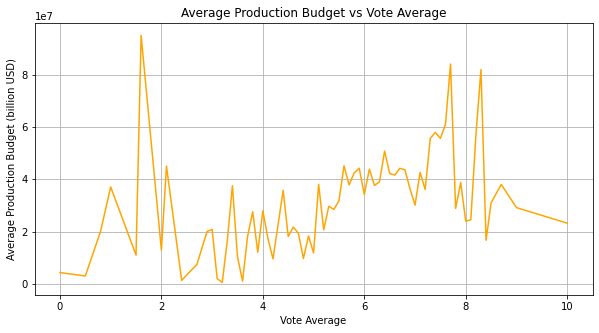

In [328]:
# production budget vs vote-average
average_budget_vote = joined_df.groupby('vote_average')['production_budget'].mean()
average_budget_vote.plot(kind='line', figsize=(10,5), color='orange')
plt.title('Average Production Budget vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Average Production Budget (billion USD)')
plt.grid(True)
plt.show()

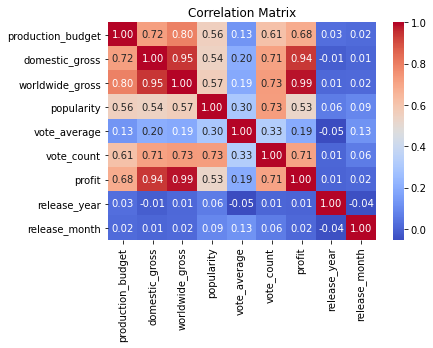

In [329]:
sns.heatmap(joined_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Despite some movies having a high production budget they still got low average rating.

In [334]:
def correlation_analysis(h0, h1,x,y, alpha):
    """Analyzes and prints the nature of the correlation coefficient."""
    print(f"H0: {h0}")
    print(f"H1: {h1}")
    corr, p_value = pearsonr(x, y)
    print(f"Correlation coefficient: {corr:.2f}")
    print(f"P-value: {p_value:.2e}")
    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")
    if corr > 0 and corr < 0.5:
        print("There is a weak positive correlation between production budget and vote average.")
    elif corr < 0 and corr > -0.5:
        print("There is a weak negative correlation between production budget and vote average.")
    else:
        print("There is no linear correlation between production budget and vote average.")
correlation_analysis(h0, h1, joined_df['production_budget'], joined_df['vote_average'], alpha=0.05)

H0: There is no correlation between production budget and vote average.
H1: There is a correlation between production budget and vote average.
Correlation coefficient: 0.13
P-value: 1.26e-09
Reject the null hypothesis.
There is a weak positive correlation between production budget and vote average.


#### Recommendation
#### Don’t rely on production budget to predict movie ratings. Most movies with high budgets aren’t guaranteed to have high ratings.

In [ ]:
# create a `profit_earned ` column form subtracting gross from budget
budgets['profit_earned_worldwide'] = budgets['worldwide_gross'] - budgets['production_budget']
budgets['profit_earned_domestic'] = budgets['domestic_gross'] - budgets['production_budget']

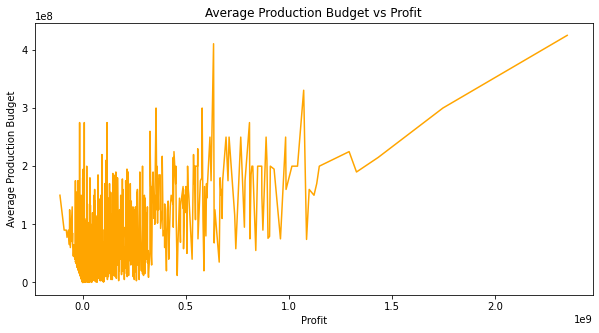

In [ ]:
# Create a Profit column (worldwide_gross - production_budget)
joined_df['Profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']

# Now group and plot
average_budget_profit = joined_df.groupby('Profit')['production_budget'].mean()
average_budget_profit.plot(kind='line', figsize=(10,5), color='orange')
plt.title('Average Production Budget vs Profit')
plt.xlabel('Profit')
plt.ylabel('Average Production Budget')
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Hypothesis test
corr, p_value = pearsonr(joined_df['Profit'], joined_df['production_budget_billion'])
print(f"Correlation: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject H₀: There is a significant correlation between budget and profit.")
else:
    print("Fail to reject H₀: No significant correlation between budget and profit.")


Correlation: 0.68
P-value: 0.0000
Reject H₀: There is a significant correlation between budget and profit.


#### High-budget films can generate higher profit, but it’s not guaranteed — careful planning and cost control are essential.


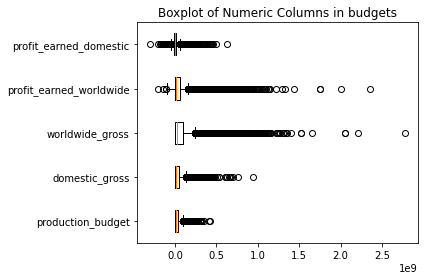

In [ ]:
# plot the Number data to check on the outliers
# Select numeric columns
numeric_cols =['production_budget','domestic_gross', 'worldwide_gross','profit_earned_worldwide','profit_earned_domestic']
numeric= budgets[numeric_cols]
# Create  boxplots
plt.boxplot(numeric.values, vert=False)
plt.yticks(range(1, len(numeric.columns) + 1), numeric.columns)
plt.title("Boxplot of Numeric Columns in budgets")
plt.tight_layout()
plt.show()


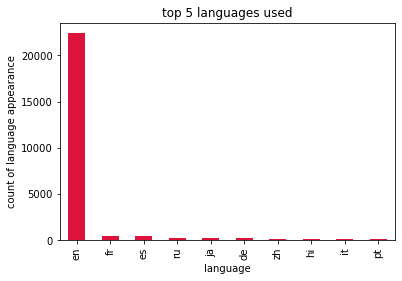

In [ ]:
#Retrieve the first ten languages used.
movies['original_language'].value_counts().head(10)
# plot a hist of the top 5 languages used
movies['original_language'].value_counts().head(10).plot(kind = 'bar',  color = 'crimson' )
plt.title('top 5 languages used')
plt.xlabel('language')
plt.ylabel('count of language appearance')
plt.show()

### English was the most used language in the movie productions